In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sensor import ULA

In [ ]:
theta_0 = 0
nr = 7
d = 0.5

ula_normal = ULA(nr, d)
coef = ula_normal.get_steering_vector(theta_0)
p_fft, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef) # FFT solution
p, angle_bins = ula_normal.get_beam_pattern(theta_0) # analytical solution

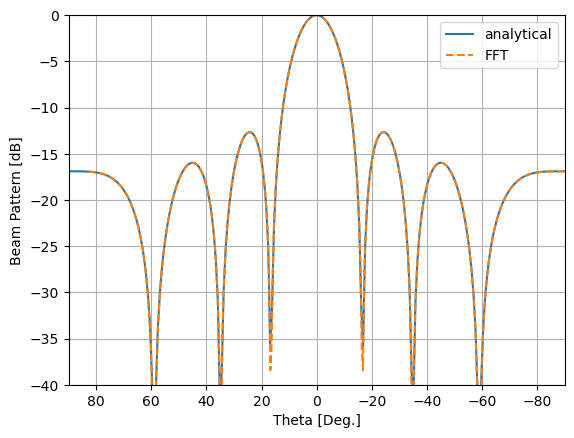

In [ ]:
angle_bins_deg = np.rad2deg(angle_bins)
angle_bins_fft_deg = np.rad2deg(angle_bins_fft)

fig, ax = plt.subplots()
ax.set_ylabel('Beam Pattern [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([-40, 0])
ax.plot(angle_bins_deg, p, '-', label='analytical')
ax.plot(angle_bins_fft_deg, p_fft, '--', label='FFT')
ax.invert_xaxis()
ax.grid()
ax.legend()

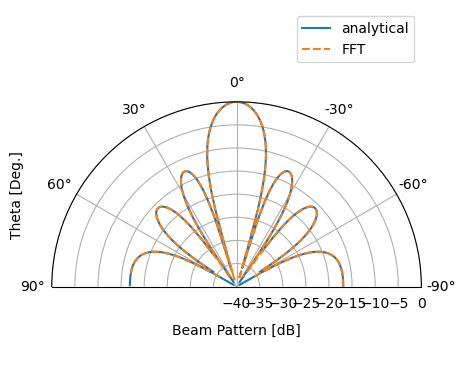

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_thetalim([-np.pi/2, np.pi/2])
ax.set_rlim([-40, 0])
ax.set_theta_zero_location('N')
ax.set_xlabel('Beam Pattern [dB]', labelpad=-40)
ax.set_ylabel('Theta [Deg.]', labelpad=20)
ax.plot(angle_bins, p, '-', label='analytical')
ax.plot(angle_bins_fft, p_fft, '--', label='FFT')
ax.legend()

In [ ]:
theta_0_deg = 35
theta_0 = np.deg2rad(theta_0_deg)
coef = ula_normal.get_steering_vector(theta_0)
p_fft, _ = ula_normal.get_beam_pattern_fft(coef)
p, _ = ula_normal.get_beam_pattern(theta_0)

In [ ]:
theta_0 = 0
p, angle_bins = ula_normal.get_beam_pattern(theta_0)

d_grating = 0.8
ula_grating = ULA(nr, d_grating)
p_grating, angle_bins_grating = ula_grating.get_beam_pattern(theta_0)

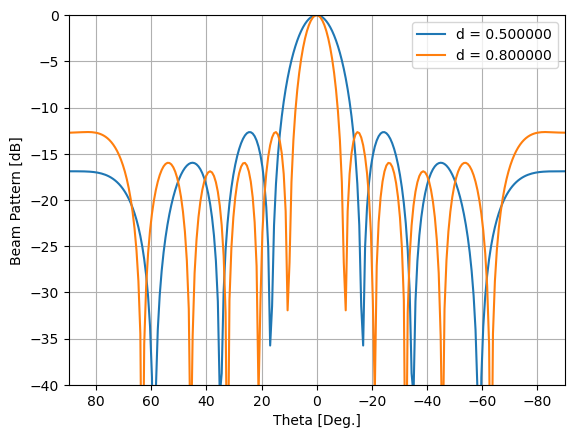

In [ ]:
angle_bins_deg = np.rad2deg(angle_bins)
angle_bins_grating_deg = np.rad2deg(angle_bins_grating)

fig, ax = plt.subplots()
ax.set_ylabel('Beam Pattern [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([-40, 0])
ax.plot(angle_bins_deg, p, label='d = {:f}'.format(d))
ax.plot(angle_bins_grating_deg, p_grating, label='d = {:f}'.format(d_grating))
ax.invert_xaxis()
ax.grid()
ax.legend()

In [ ]:
theta_0_deg = 35
theta_0 = np.deg2rad(theta_0_deg)
p, angle_bins = ula_normal.get_beam_pattern(theta_0)
p_grating, angle_bins_grating = ula_grating.get_beam_pattern(theta_0)

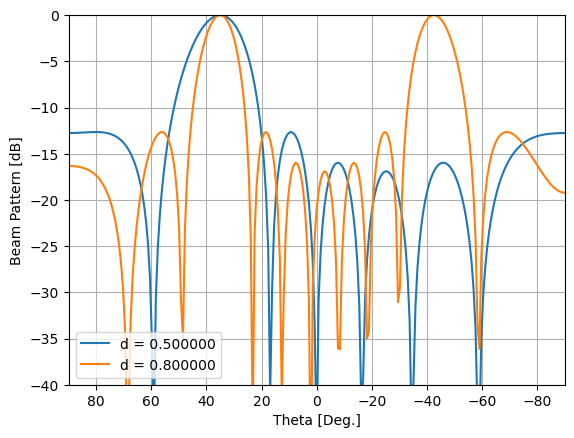

In [ ]:
angle_bins_deg = np.rad2deg(angle_bins)
angle_bins_grating_deg = np.rad2deg(angle_bins_grating)

fig, ax = plt.subplots()
ax.set_ylabel('Beam Pattern [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([-40, 0])
ax.plot(angle_bins_deg, p, label='d = {:f}'.format(d))
ax.plot(angle_bins_grating_deg, p_grating, label='d = {:f}'.format(d_grating))
ax.invert_xaxis()
ax.grid()
ax.legend()

In [ ]:
ds = np.arange(1, 6) / 10
ps = []
for dd in ds:
    u = ULA(nr, dd)
    p, angle_bins = u.get_beam_pattern()
    ps.append(p)

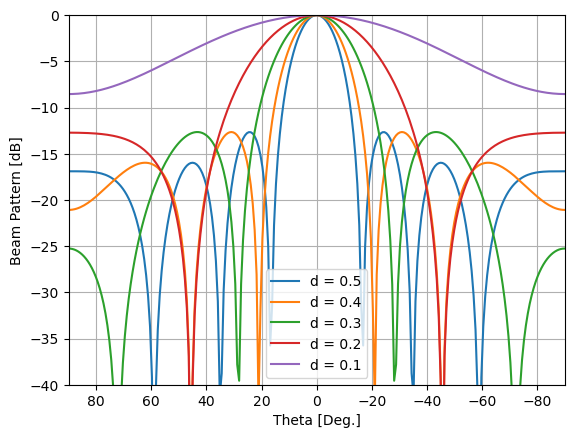

In [ ]:
angle_bins_deg = np.rad2deg(angle_bins)

fig, ax = plt.subplots()
ax.set_ylabel('Beam Pattern [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([-40, 0])
for k in range(len(ds)):
    ax.plot(angle_bins_deg, ps[-(k+1)], label='d = {:1.1f}'.format(ds[-(k+1)]))
ax.invert_xaxis()
ax.grid()
ax.legend()

In [ ]:
ds = np.arange(0.01, 2, 0.01)
ps = []
for dd in ds:
    u = ULA(nr, dd)
    p, angle_bins = u.get_beam_pattern()
    ps.append(p)

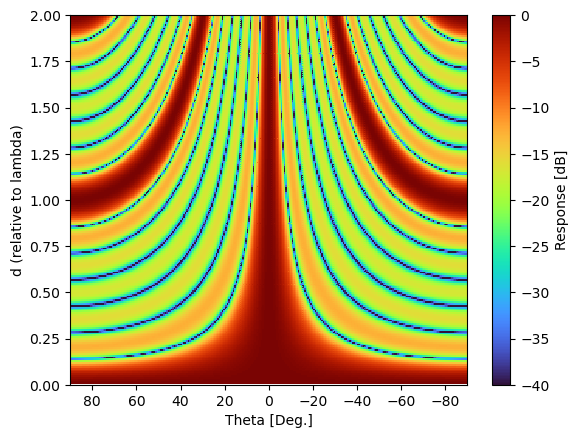

In [ ]:
angle_bins_deg = np.rad2deg(angle_bins)

min_dB = -40
pds = np.array(ps)
fig, ax = plt.subplots()
cm = ax.pcolor(angle_bins_deg, ds, pds, cmap='turbo', vmin=min_dB)
fig.colorbar(cm, ax=ax, label='Response [dB]')
ax.set_ylabel('d (relative to lambda)')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([0, 2])
ax.invert_xaxis()

In [ ]:
theta_0 = 0
nr = 32
d = 0.5
ula_normal = ULA(nr, d)

In [ ]:
coef = ula_normal.get_steering_vector(theta_0)
p_fft, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef)

t = np.arange(0, nr)
rectangular_window = np.ones(nr)
hanning_window = np.hanning(nr)
coef_hanning = coef * hanning_window
p_hanning_fft, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef_hanning)
hamming_window = np.hamming(nr)
coef_hamming = coef * hamming_window
p_hamming_fft, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef_hamming)
blackman_window = np.blackman(nr)
coef_blackman = coef * blackman_window
p_blackman_fft, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef_blackman)

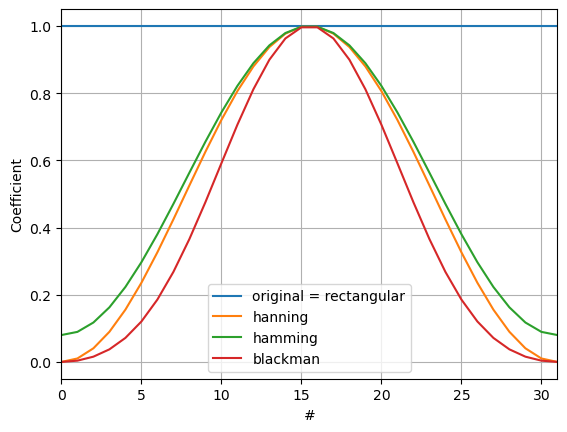

In [ ]:
fig, ax = plt.subplots()
ax.set_ylabel('Coefficient')
ax.set_xlabel('#')
ax.set_xlim([0, nr - 1])
ax.plot(t, rectangular_window, label='original = rectangular')
ax.plot(t, hanning_window, label='hanning')
ax.plot(t, hamming_window, label='hamming')
ax.plot(t, blackman_window, label='blackman')
ax.grid()
ax.legend()

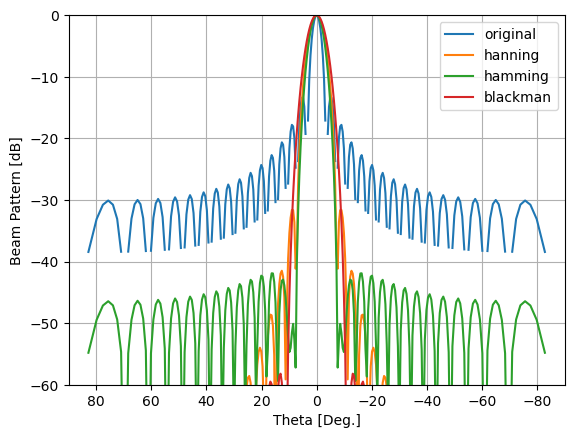

In [ ]:
angle_bins_fft_deg = np.rad2deg(angle_bins_fft)

fig, ax = plt.subplots()
ax.set_ylabel('Beam Pattern [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([-60, 0])
ax.plot(angle_bins_fft_deg, p_fft, label='original')
ax.plot(angle_bins_fft_deg, p_hanning_fft, label='hanning')
ax.plot(angle_bins_fft_deg, p_hamming_fft, label='hamming')
ax.plot(angle_bins_fft_deg, p_blackman_fft, label='blackman')
ax.invert_xaxis()
ax.grid()
ax.legend()

In [ ]:
theta_0 = 0
nr = 7
d = 0.5
ula_normal = ULA(nr, d)
ula_normal2 = ULA(4, d)

# 7-ULA
coef = ula_normal.get_steering_vector(theta_0)
p_fft, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef)
mra_weight = np.array([1, 1, 0, 0, 1, 0, 1])
coef_mra = coef * mra_weight
p_fft_mra, angle_bins_fft = ula_normal.get_beam_pattern_fft(coef_mra)
# 4-ULA
coef2 = ula_normal2.get_steering_vector(theta_0)
p_fft2, angle_bins_fft2 = ula_normal2.get_beam_pattern_fft(coef2)

In [ ]:
angle_bins_fft_deg = np.rad2deg(angle_bins_fft)
angle_bins_fft2_deg = np.rad2deg(angle_bins_fft2)

fig, ax = plt.subplots()
ax.set_ylabel('Beam Pattern [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-90, 90])
ax.set_ylim([-40, 0])
ax.plot(angle_bins_fft_deg, p_fft, label='ULA-7')
ax.plot(angle_bins_fft_deg, p_fft_mra, label='MRA-4')
ax.plot(angle_bins_fft2_deg, p_fft2, label='ULA-4')
ax.invert_xaxis()
ax.grid()
ax.legend()

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_thetalim([-np.pi/2, np.pi/2])
ax.set_rlim([-40, 0])
ax.set_theta_zero_location('N')
ax.set_xlabel('Beam Pattern [dB]', labelpad=-40)
ax.set_ylabel('Theta [Deg.]', labelpad=20)
ax.plot(angle_bins_fft, p_fft, label='ULA-7')
ax.plot(angle_bins_fft, p_fft_mra, '-', label='MRA-4')
ax.plot(angle_bins_fft2, p_fft2, label='ULA-4')
ax.legend()

In [ ]:
theta_0_deg = 18
theta_0 = np.deg2rad(theta_0_deg)

# 4-MRA 18 degrees
coef_18 = ula_normal.get_steering_vector(theta_0)
coef_mra_18 = coef_18 * mra_weight
p_fft_mra_18, _ = ula_normal.get_beam_pattern_fft(coef_mra_18)

In [ ]:
fig, ax = plt.subplots()
ax.set_ylabel('Response [dB]')
ax.set_xlabel('Theta [Deg.]')
ax.set_xlim([-20, 40])
ax.set_ylim([-40, 0])
ax.plot(angle_bins_fft_deg, p_fft_mra, '--', label='MRA-4 (0 deg.)')
ax.plot(angle_bins_fft_deg, p_fft_mra_18, '--', label='MRA-4 (18 deg.)')
ax.plot(angle_bins_fft_deg, p_fft_mra + p_fft_mra_18, label='MRA-4 (0+18 deg.)')
ax.invert_xaxis()
ax.grid()
ax.legend()

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_thetalim([-np.pi/2, np.pi/2])
ax.set_rlim([-40, 0])
ax.set_theta_zero_location('N')
ax.set_xlabel('Beam Pattern [dB]', labelpad=-40)
ax.set_ylabel('Theta [Deg.]', labelpad=20)
ax.plot(angle_bins_fft, p_fft_mra, '--', label='MRA-4 (0 deg.)')
ax.plot(angle_bins_fft, p_fft_mra_18, '--', label='MRA-4 (18 deg.)')
ax.plot(angle_bins_fft, p_fft_mra + p_fft_mra_18, label='MRA-4 (0+18 deg.)')
ax.legend()